In this lab, we will use functions to help us prepare for Christmas, including decorating a  Christmas tree.

<h3> 1. Christmas BUDGET</h3>
<ul>
    <li> transportation=10 </li>
    <li> meal = 15</li>
    <li> presents = 50</li>
    <li> activities = 25</li>
    
 The following code will create a pie chart of this budget.

In [1]:
import matplotlib.pyplot as plt  #plot library
fig, ax = plt.subplots(figsize=(5,5)) #you can adjust the figsize  (5,5)=(length,width)
        
budget_items = ['transportation','meal','presents','activities'] #categories
budget = [10,15,50,25] #enter the amounts for 'presents' and 'activities
total=sum(budget)
ax=plt.pie(budget,labels=budget_items,autopct=lambda p: '${:.0f}'.format(p * total / 100)) #make pie chart  autopct='%1.0f%%'
plt.gca().set_title("Christmas Budget") #add a title

Text(0.5,1,'Christmas Budget')

<h3> 2. WORD CLOUD CHRISTMAS CARD</h3>
We'll use the lyrics to the Twelve Days of Christmas as the background for a Chistmas card.

In [2]:
import wordcloud

In [3]:
#Define a function which counts the interesting words
def calculate_frequencies(textfile):
    #list of punctuations
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    #list of uninteresting words 
    uninteresting_words = ["AND","BY","IT","THE","THAT","A","IS","HAD","TO","NOT","BUT","FOR","OF","WHICH","IF","IN","ON","WERE","YE","THOU"]
    
     # removes punctuation and uninteresting words
    import re
    fc1=str(textfile)
    fc2= fc1.split(' ')
    for i in range(len(fc2)): 
        fc2[i] = fc2[i].upper()
    #Remove punctuations
    fc3 = []
    for s in fc2:
        if not any([o in s for o in punctuations]):
            fc3.append(s)
    #Remove uninteresting words
    fc4=[]
    for s in fc3:
        if not any([o in s for o in uninteresting_words]):
            fc4.append(s)
    fc5=[]
    for s in fc4:
        if not any([o.lower() in s for o in uninteresting_words]):
            fc5.append(s)
            
    while('' in fc5) : 
        fc5.remove('') 
        
    import collections
    fc6 = collections.Counter(fc5)

    #wordcloud
    cloud = wordcloud.WordCloud( max_words = 12)  #can adjust the number of words
    cloud.generate_from_frequencies(fc6)
    return cloud.to_array()

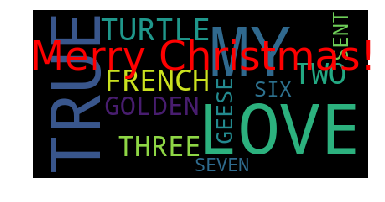

In [4]:
#Open the text file with the words to be plotted.
with open('twelvedays.txt','r') as file:  
    carol = file.readlines()
    
#make the wordcloud   
carol = calculate_frequencies(carol)
plt.imshow(carol, interpolation = 'nearest')
plt.text(-5,70,"Merry Christmas!",color='r',size=40) #Add Christmas! after Merry
plt.axis('off')
plt.savefig('card.png', bbox_inches='tight')  

<h3> 3. Analysis of Christmas Hits</h3>
Read and display the first five lines in the file christmas_billboard_data.csv. What song appears on the chart the greatest number of times?  

In [5]:
import pandas as pd
df=pd.read_csv("christmas_billboard_data.csv")
df.head()

url      weekid  \
0  http://www.billboard.com/charts/hot-100/1958-1...  12/13/1958   
1  http://www.billboard.com/charts/hot-100/1958-1...  12/20/1958   
2  http://www.billboard.com/charts/hot-100/1958-1...  12/20/1958   
3  http://www.billboard.com/charts/hot-100/1958-1...  12/20/1958   
4  http://www.billboard.com/charts/hot-100/1958-1...  12/27/1958   

   week_position              song     performer                       songid  \
0             83   RUN RUDOLPH RUN   Chuck Berry   Run Rudolph RunChuck Berry   
1             57  JINGLE BELL ROCK   Bobby Helms  Jingle Bell RockBobby Helms   
2             73   RUN RUDOLPH RUN   Chuck Berry   Run Rudolph RunChuck Berry   
3             86   WHITE CHRISTMAS   Bing Crosby   White ChristmasBing Crosby   
4             44   GREEN CHRI$TMA$  Stan Freberg  Green Chri$tma$Stan Freberg   

   instance  previous_week_position  peak_position  weeks_on_chart  year  \
0         1                     NaN             69               3  1958   
1         1                     NaN             29              19  1958   
2         1                    83.0             69               3  1958   
3         1                     NaN             12              13  1958   
4         1                     NaN             44               2  1958   

   month  day  
0     12   13  
1     12   20  
2     12   20  
3     12   20  
4     12   27

In [6]:
df["song"].value_counts()  #add the missing info

JINGLE BELL ROCK                                                           28
ALL I WANT FOR CHRISTMAS IS YOU                                            20
ROCKIN' AROUND THE CHRISTMAS TREE                                          19
WHITE CHRISTMAS                                                            16
THE CHIPMUNK SONG (CHRISTMAS DON'T BE LATE)                                16
MISTLETOE                                                                  14
BETTER DAYS                                                                13
THIS ONE'S FOR THE CHILDREN                                                12
AMEN                                                                       11
PLEASE COME HOME FOR CHRISTMAS                                             11
IF WE MAKE IT THROUGH DECEMBER                                             10
THE MARVELOUS TOY                                                           9
LITTLE ALTAR BOY                                                

<h3>4. Creating a Christmas Carol</h3>

In [7]:
import numpy as np
from IPython.display import Audio 
rest=0
do=220
re=9/8*220
mi=5/4*220
fa=4/3*220
so=3/2*220
la=5/3*220
ti=15/8*220
do1=2*220
re1=2*9/8*220
mi1=2*5/4*220
fa1=2*4/3*220
so1=2*3/2*220
la1=2*5/3*220
ti1=2*15/8*220
do2=2*2*220
la0=5/3*110
do0=110
silentnight=[so,la,so,mi,mi,mi,so,la,so,mi,mi,mi,re1,rest,re1,ti,ti,ti,do1,rest,do1,so,so,so,la,rest,la,do1,ti,la,so,la,so,mi,mi,mi,la,rest,la,do1,ti,la,so,la,so,mi,mi,mi,re1,rest,re1,fa1,re1,ti,do1,do1,do1,mi1,mi1,mi1,do1,so,mi,so,fa,re,do,do,do,do,do,do]

In [8]:
def play(song):
    song=np.array(song)
    framerate = 44100
    t = np.linspace(0, len(song) / 2, round(framerate * len(song) / 2))[:-1]
    song_idx = np.floor(t * 2).astype(int)
    data = np.sin(2 * np.pi * song[song_idx] * t)
    return Audio(data, rate=framerate, autoplay=True)
play(silentnight) #supply what is missing to this function

<h3> 5. Decorating a Christmas Tree</h3>

a) Import libraries.

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import numpy as np

b) Create an ornament class.  

In [10]:
class ORNAMENT:
    def __init__(self,x,y,image,size):   #properties
        self.x=x  #object's position is (x,y)
        self.y=y
        self.image=image  #name of the image file
        self.size=size  #specify the size
        
    def moveup(self,yamount):  #method to move the object vertically
        self.y = self.y+yamount
        
    def movedown(self,yamount):  #method to move the object vertically
        self.y = self.y-yamount
                    
                    
    def moveright(self,xamount):  #method to move the object horizontally
        self.x = self.x+xamount
        
    def moveleft(self,xamount):  #method to move the object horizontally
        self.x = self.x-xamount
        
    def zoom(self,factor):   #method to enlarge or shrink the object
        self.size= self.size*factor

        return  


c) Create the ornament objects and position them on a  tree.

In [11]:
#create ornament objects
o1=ORNAMENT(.1,.7,'O1.jpg',.3)
o2=ORNAMENT(.1,.4,'O2.jpg',.2)
o3=ORNAMENT(.1,.2,'O3.jpg',.3)
star=ORNAMENT(.9,.5,'star.png',.1)

In [12]:
#create a function to put the ornaments on a tree
def decorate(o1,o2,o3,star):
    #make a graph
    fig, ax = plt.subplots(frameon=False)
    ax.set_aspect('equal')

    #add a tree
    treefig = mpimg.imread('xtree.png')
    imagebox = OffsetImage(treefig, zoom=0.5)
    ab = AnnotationBbox(imagebox, (0.5, 0.45),frameon=False)
    ax.add_artist(ab)

    orn1 = mpimg.imread(o1.image)
    imagebox= OffsetImage(orn1, zoom=o1.size)
    firstorn = AnnotationBbox(imagebox, (o1.x, o1.y),frameon=False)
    ax.add_artist(firstorn)

    orn2 = mpimg.imread(o2.image)
    imagebox= OffsetImage(orn2, zoom=o2.size)
    secondorn = AnnotationBbox(imagebox, (o2.x, o2.y),frameon=False)
    ax.add_artist(secondorn)


    orn3 = mpimg.imread(o3.image)
    imagebox= OffsetImage(orn3, zoom=o3.size)
    thirdorn = AnnotationBbox(imagebox, (o3.x, o3.y),frameon=False)
    ax.add_artist(thirdorn)

    starorn = mpimg.imread(star.image)
    imagebox= OffsetImage(starorn, zoom=star.size)
    thirdorn = AnnotationBbox(imagebox, (star.x, star.y),frameon=False)
    ax.add_artist(thirdorn)
    return

Let's start decorating!

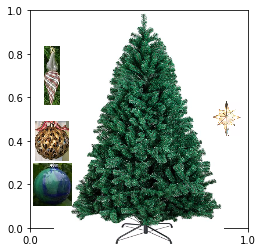

In [13]:
decorate(o1,o2,o3,star)

Let's move the first ornament (o1) to the right by .4 units.

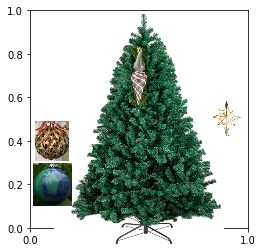

In [14]:
o1.moveright(.4)
decorate(o1,o2,o3,star)

<h3>ASSIGNMENT</h3>
Now you can finish decorating the tree!

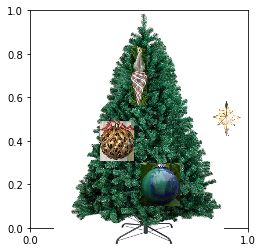

In [15]:
o2.moveright(.3)
o3.moveright(.5)
decorate(o1,o2,o3,star)

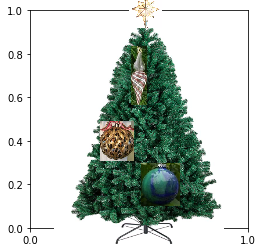

In [16]:
star.moveleft(.37)
star.moveup(.5)
decorate(o1,o2,o3,star)